In [4]:
%matplotlib inline
import matplotlib as mpl
font_cache_path = mpl.get_cachedir() + '/fontList.cache'
%rm $font_cache_path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import pandas as pd

rm: /Users/arimuraterutoshi/.matplotlib/fontList.cache: No such file or directory


In [7]:
# python基礎
# 内積計算
v1 = np.array((1,2,3))
v2 = np.array((4,5,6))
# 1*4 + 2*5 + 3*6
np.dot(v1, v2)

32

In [8]:

v3 = np.array((-1, -0.5, 0, 0.5, 1))
np.where(v3 >= 0.0, 1, -1) # 0以上は1にしてそれ以外は-1にする

array([-1, -1,  1,  1,  1])

In [35]:
v4 = np.array((1,2,3))
v5 = np.array((4,5,6,7))
for x, y in zip(v4, v5):
    print(str(x) + ":" + str(y))

1:4
2:5
3:6


# 動作確認

In [10]:
# あやめの機械学習用データをcsv形式で読み込む
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
# yにあやめの種類を格納
y = df.iloc[0:100, 4].values
# setosaだったら-1を格納、それ以外は1にする
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length xにはsepalとpetalの長さを格納
X = df.iloc[0:100, [0, 2]].values

In [11]:
# 学習率を初期化
eta = 0.1

In [12]:
# 先頭の3件確認
y[:3]

array([-1, -1, -1])

In [13]:
# 入力Xの先頭3件確認
X[:3]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3]])

In [14]:
print("sepal length: petal length: type of iris")
count = 0
# 入力Xと目的変数yの中身を確認
for xi, target in zip(X, y):
    print(str(xi[0]) + ":" + str(xi[1]) + ":" + str(target))
    count = count + 1
    if(count > 3) :
        break

sepal length: petal length: type of iris
5.1:1.4:-1
4.9:1.4:-1
4.7:1.3:-1
4.6:1.5:-1


In [15]:
X.shape

(100, 2)

In [16]:
# 初期のパラメータ設定w_[0]がバイアスでそれ以降は重み
w_ = np.zeros(1 + X.shape[1])
w_

array([ 0.,  0.,  0.])

In [17]:
# X[0]に対して順伝搬で計算
jundenpan = np.dot(X[0], w_[1:]) + w_[0]
print(jundenpan)

0.0


In [18]:
# 順伝搬の計算結果が0以上かそれ以下かで判定する
predict = np.where(jundenpan >= 0.0, 1, -1)
print(predict)

1


In [19]:
# 実際の目的変数と現在のパラメータによる順伝搬計算結果の差を取得
diff = y[0] - predict
print(diff)

-2


In [46]:
# パラメータの更新
print(w_)
w_[1:] += eta * diff * X[0]
w_[0] += eta * diff
print(w_)

[ 0.  0.  0.]
[-0.2  -1.02 -0.28]


In [47]:
# 学習実施
study_num = 10 #学習回数を設定
for _ in range(study_num):
    for xi, target in zip(X, y):
        jundenpan = np.dot(xi, w_[1:]) + w_[0]
        predict = np.where(jundenpan >= 0.0, 1, -1)
        diff = y[0] - predict
        # パラメータ更新
        w_[1:] += eta * diff * X[0]
        w_[0] += eta * diff

In [48]:
# 学習後のパラメータを用いて再度判定
jundenpan = np.dot(X[0], w_[1:]) + w_[0]
print("順伝搬計算結果:" + str(jundenpan))
predict = np.where(jundenpan >= 0.0, 1, -1)
print("判定結果:" + str(predict))
if predict == y[0]:
    print("success")
else:
    print("fail")

順伝搬計算結果:-5.794
判定結果:-1
success


In [49]:
class Perceptron(object):
    """パーセプトロンの分類器

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        トレーニング回数

    Attributes
    -----------
    w_ : 1d-array
        バイアスと重み w_[0]がバイアスでw_[1]以降が重み
    errors_ : list
        各エポックでの誤分類数

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            トレーニングデータ
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            目的変数

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [50]:
import pandas as pd
# あやめの機械学習用データをcsv形式で読み込む
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


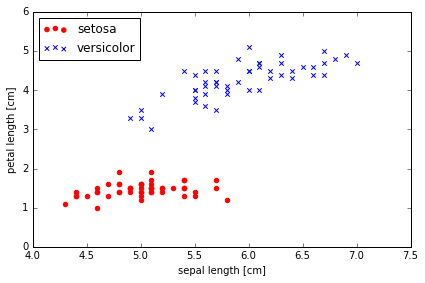

In [51]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()



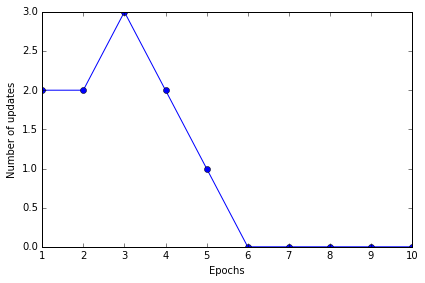

In [52]:
# パラメータの学習
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [53]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

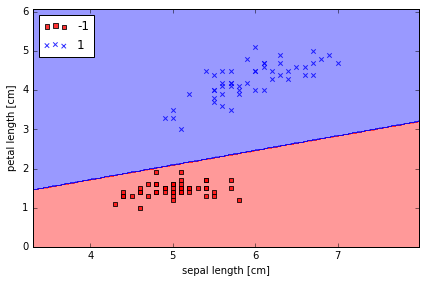

In [54]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()